In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [15]:
#Loading model
cnn = tf.keras.models.load_model('trained_model.h5')

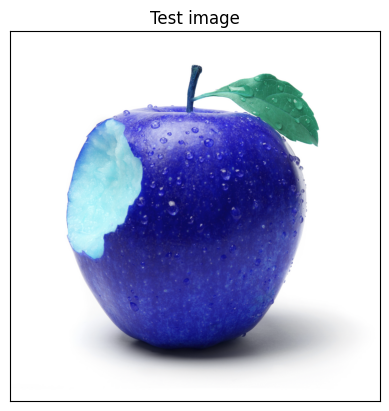

In [16]:
#Visualization and performing prediction on single image
import cv2
image_path = "archive/test/apple/Image_1.jpg"
img = cv2.imread(image_path)
plt.imshow(img)
plt.title("Test image")
plt.xticks([])
plt.yticks([])
plt.show()

In [17]:
#Testing model
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
input_array = tf.keras.preprocessing.image.img_to_array(image)
input_array = np.array([input_array]) #Converting single image to batch
predictions = cnn.predict(input_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [18]:
print(predictions)

[[1.0000000e+00 1.4663023e-15 7.8774669e-12 1.1330870e-13 1.6916184e-20
  2.6015659e-12 9.6681419e-13 3.7250368e-19 7.2441189e-12 9.5702553e-14
  2.0787739e-13 4.0830637e-14 6.4609142e-18 2.0861725e-18 2.4802964e-16
  1.0368133e-15 4.6484466e-12 2.9994313e-16 5.9419771e-18 1.3944468e-13
  1.5425820e-13 2.9819161e-14 1.6553283e-12 2.6764466e-14 3.1224305e-21
  4.1382916e-14 6.4765345e-14 5.8142372e-18 3.0692107e-14 1.3984864e-18
  1.0486979e-17 5.8298982e-17 3.2155683e-13 9.2067777e-12 4.9546853e-16
  4.5330528e-13]]


In [19]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'archive/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [20]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [21]:
result_index = np.where(predictions[0] == np.max(predictions[0]))
print(result_index[0])

[0]


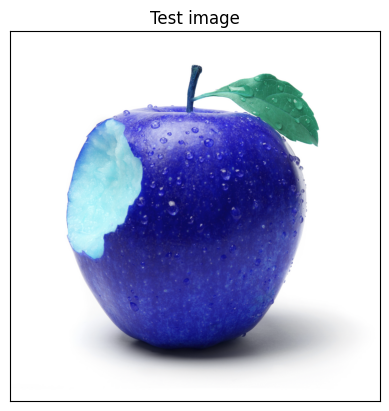

In [22]:
#Display image
plt.imshow(img)
plt.title("Test image")
plt.xticks([])
plt.yticks([])
plt.show()

In [27]:
#Single prediction
x = test_set.class_names[result_index[0][0]]
print("Prediction: {}".format(x))

Prediction: apple


In [28]:
import requests

query = '1lb brisket and fries'
api_url = 'https://api.api-ninjas.com/v1/nutrition?query={}'.format(x)
response = requests.get(api_url, headers={'X-Api-Key': 'II31ME1p/Vg6OARm7wOHdw==E5ctXHnE5XMI6sIl'})
if response.status_code == requests.codes.ok:
    print(response.text)
else:
    print("Error:", response.status_code, response.text)

[{"name": "apple", "calories": 53.0, "serving_size_g": 100.0, "fat_total_g": 0.2, "fat_saturated_g": 0.0, "protein_g": 0.3, "sodium_mg": 1, "potassium_mg": 11, "cholesterol_mg": 0, "carbohydrates_total_g": 14.1, "fiber_g": 2.4, "sugar_g": 10.3}]
